In [0]:

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [0]:
def to_pgm() #convert png symbols on net to pgm and save


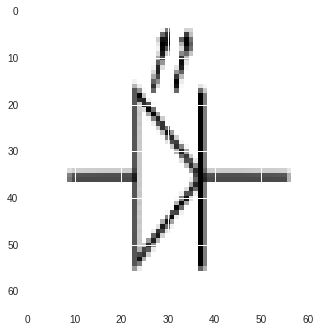

In [0]:
image = cv2.imread('/content/drive/My Drive/led1.png')
plt.imshow(image)

resized_image = cv2.resize(image, (64,64)) 
plt.imshow(resized_image)

plt.imsave('/content/drive/My Drive/lsd_1.6/resized_led1.png',resized_image)


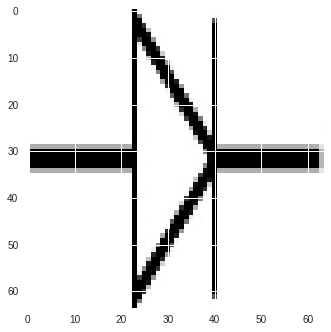

In [0]:
image = cv2.imread('/content/drive/My Drive/lsd_1.6/di.png')
plt.imshow(image)

resized_image = cv2.resize(image, (64,64)) 
plt.imshow(resized_image)

plt.imsave('/content/drive/My Drive/lsd_1.6/resized_di.png',resized_image)


In [0]:
cd /content/drive/My\ Drive/lsd_1.6/

/content/drive/My Drive/lsd_1.6


In [0]:
!make clean

rm -f lsd lsd_call_example


In [0]:
!make

cc -O3 -o lsd lsd_cmd.c lsd.c -lm
cc -o lsd_call_example lsd_call_example.c lsd.c -lm


In [0]:
!./lsd -P diode.result.eps resized_di.PGM diode.result.txt

In [0]:
def augment_lines(filename):
  
  lines = pd.read_csv(filename,delimiter=' ',header=None)
  lines['slope'] = (lines[3] - lines[1])/(lines[2]-lines[0])
  lines['degree'] = (np.arctan(lines['slope'])*(180/np.pi))
  lines['length'] = np.sqrt( (lines[0] - lines[2])**2 + (lines[3] - lines[1])**2 )
  
  return lines
  

In [0]:
lines_df = augment_lines('diode.result.txt')
lines_df
#1,3,4

,0,1,2,3,4,5,6,7,slope,degree,length
0,40.733211,34.358104,41.060093,60.635137,2.499807,0.125,21.595404,NaN,80.386907,89.287287,26.279066
1,24.000706,9.375336,23.983916,53.125330,1.266310,0.125,19.595805,NaN,-2605.717332,-89.978012,43.749997
2,41.000295,3.117732,40.792405,28.136778,2.489527,0.125,25.838548,NaN,-120.347520,-89.523925,25.019910
3,38.465805,31.157725,24.592352,7.480060,3.833830,0.125,29.592747,NaN,1.706689,59.632685,27.442750
4,24.815128,55.152086,38.653490,31.453684,3.592925,0.125,31.760916,NaN,-1.712515,-59.717785,27.442932
5,24.195223,0.729189,39.040475,26.344439,3.809822,0.125,31.368997,NaN,1.725484,59.905674,29.606123
6,1.853932,29.080760,21.887922,29.272115,3.905034,0.125,30.752233,NaN,0.009552,0.547245,20.034904
7,41.860098,29.282451,63.135226,29.046302,3.944003,0.125,26.692565,NaN,-0.011100,-0.635944,21.276439
8,38.684676,37.197069,23.916209,62.860986,3.679668,0.125,31.237266,NaN,-1.737751,-60.081447,29.609867
9,22.131335,63.120655,21.665360,35.628553,2.584376,0.125,14.059217,NaN,58.999092,89.028963,27.496051


In [0]:
#fuction takes in lsd txt file and returns a dict that has all vertical and horizontal lines withco-ordinates (x1,y1,x2,y2)
from collections import defaultdict
def extract_lines(lines_df):
  #x1, y1, x2, y2, width, p, -log_nfa.
  
  #decide horizontal/vertical based on slope
  
  vertical_lines = lines_df[ np.abs(lines_df['degree']) > 88.0 ]
  horizontal_lines = lines_df[ np.abs(lines_df['degree']) < 1.0 ]
  
  ##y1 x1 y2 x2 is roi value. Store in roi format
  lines_dict = defaultdict(list)
  for line in vertical_lines.values:
    lines_dict['vertical'].append(line)
  for line in horizontal_lines.values:
    lines_dict['horizontal'].append( line )
  
  return lines_dict

In [0]:
extract_lines(lines_df)

defaultdict(list,
            {'horizontal': [array([1.85393200e+00, 2.90807600e+01, 2.18879220e+01, 2.92721150e+01,
                     3.90503400e+00, 1.25000000e-01, 3.07522330e+01,            nan,
                     9.55151720e-03, 5.47244982e-01, 2.00349038e+01]),
              array([ 4.18600980e+01,  2.92824510e+01,  6.31352260e+01,  2.90463020e+01,
                      3.94400300e+00,  1.25000000e-01,  2.66925650e+01,             nan,
                     -1.10997687e-02, -6.35943784e-01,  2.12764386e+01]),
              array([ 2.18784400e+01,  3.37585680e+01,  1.86545500e+00,  3.38672390e+01,
                      3.84496900e+00,  1.25000000e-01,  3.51843260e+01,             nan,
                     -5.43002456e-03, -3.11114432e-01,  2.00132800e+01]),
              array([6.31481510e+01, 3.40135400e+01, 4.05989300e+01, 3.36895810e+01,
                     3.98304900e+00, 1.25000000e-01, 3.69475150e+01,            nan,
                     1.43667491e-02, 8.23097461e-01, 

In [0]:
#takes lines dataframe and tells which line is connected to which line. Returns a list of lists where each list contains
#indices of lines a given line is connected to.

#connected if one end of 1 matches some end of 2 within some threshold difference. threshold = +-5
def is_connected(lines_df):
  connections = []
  for index,line in enumerate(lines_df.values):
    
    local = []
    global_line = line
    global_p1 = (line[0],line[1])
    global_p2 = (line[2],line[3])
    
    for i in range(index+1,len(lines_df.values)):
      
      local_line = lines_df.values[i]
      local_p1 = (local_line[0],local_line[1])
      local_p2 = (local_line[2],local_line[3])
      
      
      if( abs(global_p1[0] - local_p1[0])  < 5):
        if( abs(global_p1[1] - local_p1[1])  < 5):
          local.append((i,local_p1))
          continue
      
      if( abs(global_p1[0] - local_p2[0])  < 5):
        if( abs(global_p1[1] - local_p2[1])  < 5):
          local.append((i,local_p2))
          continue
      
      if( abs(global_p2[0] - local_p1[0])  < 5):
        if( abs(global_p2[1] - local_p1[1])  < 5):
          local.append((i,local_p1))
          continue

      if( abs(global_p2[0] - local_p2[0])  < 5):
        if( abs(global_p2[1] - local_p2[1])  < 5):
          local.append((i,local_p2))
          continue 
      
      
        
            
    connections.append(local)
    
  return connections

In [0]:
connections = is_connected(lines_df)

In [0]:
connections

[[(3, (38.465804999999996, 31.157725)),
  (4, (38.653490000000005, 31.453684000000003)),
  (8, (38.684676, 37.197069)),
  (12, (40.598929999999996, 33.689581)),
  (14, (38.949284999999996, 60.636477))],
 [(3, (24.592351999999998, 7.480060000000001)), (4, (24.815128, 55.152086))],
 [(3, (38.465804999999996, 31.157725)),
  (4, (38.653490000000005, 31.453684000000003)),
  (5, (39.040475, 26.344439)),
  (7, (41.860098, 29.282451000000002)),
  (13, (39.018633, 3.117755))],
 [(4, (38.653490000000005, 31.453684000000003)),
  (5, (39.040475, 26.344439)),
  (7, (41.860098, 29.282451000000002)),
  (12, (40.598929999999996, 33.689581))],
 [(7, (41.860098, 29.282451000000002)), (12, (40.598929999999996, 33.689581))],
 [(7, (41.860098, 29.282451000000002)),
  (10, (22.143280999999998, 0.629894)),
  (13, (39.180846, 23.126573999999998))],
 [(10, (21.664633, 26.871163)), (11, (1.8654549999999999, 33.867239))],
 [(12, (40.598929999999996, 33.689581))],
 [(9, (22.131335, 63.120655000000006)),
  (12, (4

In [0]:
#want all three points to be distinct. all 3 lines must be connected
def are_points_distinct(p1,p2):
  
  if( abs(p2[0] - p1[0])  < 5):
        if( abs(p2[1] - p1[1])  < 5):
          return False
  return True
  
  
def triangles(connections):
  
  tri_list = []
  
  for index,each_first_connection in enumerate(connections):
    
    connected_indices_first = [i[0] for i in each_first_connection]
    connected_points_first = [i[1] for i in each_first_connection]
    
    for j,each_index_1 in enumerate(connected_indices_first):
      
      connection_second = connections[each_index_1]
      connected_indices_second = [i[0] for i in connection_second]
      connected_points_second = [i[1] for i in connection_second]
      
      for i,each_index_2 in enumerate(connected_indices_second):
        
        if each_index_2 in connected_indices_first:
            
            index_3 = connected_indices_first.index(each_index_2)
           
            p1 = connected_points_first[j]
            p2 = connected_points_second[i]
            p3 = connected_points_first[index_3]
            
            if are_points_distinct(p1,p2) and are_points_distinct(p2,p3):
              tri_list.append((each_index_2,each_index_1,index_3))
  return tri_list
      
    

In [0]:
tri_list = triangles(connections)

In [0]:
tri_list

[(4, 3, 1)]

In [0]:
#look at 60 degree lines. take +-5 coordinate range and search for a vertical line in that range
def has_equilateral(connections):
  #m2-m1 by 1+m1*m2

In [0]:
#for circle semi circle use circle mask rcnn?

In [0]:
#lsd run on circle

In [0]:
# angle between each pair of lines?
# line isConnected
# problem of redundant lines? Does it exist?

In [0]:
!./lsd -P led1.result.eps resized_led1.PGM led1.result.txt

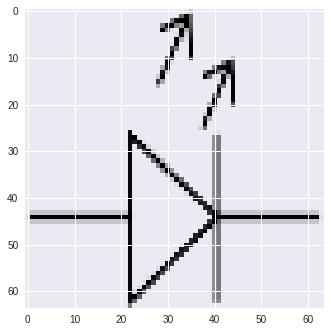

In [0]:
!./lsd -P led.result.eps resized_led.PGM led.result.txt

In [0]:
lines_df = augment_lines('led1.result.txt')
lines_df

,0,1,2,3,4,5,6,7,slope,degree,length
0,26.169113,15.733956,28.190739,5.638164,2.451336,0.125000,3.651939,NaN,-4.993897,-78.676603,10.296212
1,38.467443,38.122823,38.570799,54.380113,1.345335,0.125000,1.026215,NaN,157.294110,89.635746,16.257619
2,38.534858,18.118714,38.422563,33.127226,1.352841,0.125000,2.118760,NaN,-133.652540,-89.571316,15.008932
3,30.717905,15.649539,33.041338,6.852902,1.915273,0.125000,0.312580,NaN,-3.786052,-75.204498,9.098306
4,20.642458,36.652763,9.353249,36.844526,2.648249,0.125000,8.056239,NaN,-0.016986,-0.973155,11.290838
5,55.634685,36.838962,39.376194,36.716520,2.594064,0.125000,7.963679,NaN,0.007531,0.431484,16.258952
6,39.372603,34.041753,54.380818,33.933787,1.348879,0.125000,1.215670,NaN,-0.007194,-0.412167,15.008603
7,9.366358,33.871917,20.629313,34.002226,1.365605,0.015625,3.186968,NaN,0.011570,0.662865,11.263709
8,25.423440,49.227917,34.415857,36.904814,2.838226,0.125000,10.463298,NaN,-1.370388,-53.881016,15.255243
9,35.233571,40.012027,23.906980,55.277747,2.784820,0.125000,14.731830,NaN,-1.347777,-53.425973,19.008784


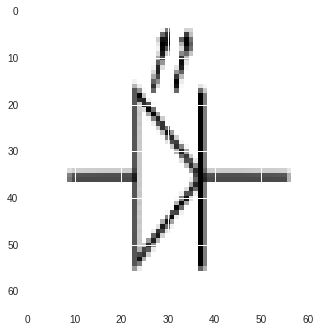

In [0]:
img = cv2.imread('/content/drive/My Drive/lsd_1.6/resized_led1.png')
plt.imshow(img)

In [0]:
connections = is_connected(lines_df)

In [0]:
triangle = triangles(connections)

In [0]:
triangle

[(6, 5, 2), (6, 5, 1), (13, 12, 2)]

In [0]:
'''6 and 5 are redundant lines!!!'''
'''remove redundant lines
12 and 2'''

'remove redundant lines\n12 and 2'

In [0]:
def redundant_lines(lines_df):